## statistics

#### statistics basically refers to study of data.
#### A statistical problems is a problem that involves variety of data.

In [4]:
import numpy as np

In [5]:
from scipy import stats

In [6]:
myList=[20,2,7,1,2,34]
print('The mean: ',np.mean(myList))
print('The median: ',np.median(myList))

The mean:  11.0
The median:  4.5


In [7]:
print("Mode: ",stats.mode(myList))

Mode:  ModeResult(mode=array([2]), count=array([2]))


In [8]:
print('Variance: ',np.var(myList))

Variance:  148.0


In [9]:
print('Standard deviation: ',np.std(myList))

Standard deviation:  12.165525060596439


## Hypothesis testing

In [10]:
a=[10,12,9,11,11,12,9,11,9,9]
b=[13,11,9,12,12,11,12,12,10,11]
ttest=stats.ttest_ind(a,b)
ttest

Ttest_indResult(statistic=-1.8534061896456464, pvalue=0.08028906893163547)

In [11]:
c=[13,12,9,12,12,13,12,13,12,13,10,11]
ttest=stats.ttest_ind(a,c)
ttest

Ttest_indResult(statistic=-2.8414828191061434, pvalue=0.01008601764832173)

In [12]:
ttest=stats.ttest_ind(b,c)
ttest

Ttest_indResult(statistic=-1.0210050879382757, pvalue=0.31944432752519136)

### ANOVA (analysis of variance)

In [15]:
# one way anova
import numpy as np
import pandas as pd
data=pd.read_csv('E:/important notes and lectures/python/INVENTATEQ/datascience/datasets/PlantGrowth.csv')

In [16]:
data.shape

(30, 3)

In [17]:
data.head()

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [18]:
import matplotlib.pyplot as plt
data.boxplot('weight',by='group',figsize=(12,8))

In [19]:
from scipy import stats
grps=pd.unique(data.group.values)
d_data={grp:data['weight'][data.group==grp] for grp in grps}
F,p=stats.f_oneway(d_data['ctrl'],d_data['trt1'],d_data['trt2'])
print('F is: ',F)
print('p is: ',p)

F is:  4.846087862380136
p is:  0.0159099583256229


In [20]:
grps

array(['ctrl', 'trt1', 'trt2'], dtype=object)

In [21]:
d_data

{'ctrl': 0    4.17
 1    5.58
 2    5.18
 3    6.11
 4    4.50
 5    4.61
 6    5.17
 7    4.53
 8    5.33
 9    5.14
 Name: weight, dtype: float64, 'trt1': 10    4.81
 11    4.17
 12    4.41
 13    3.59
 14    5.87
 15    3.83
 16    6.03
 17    4.89
 18    4.32
 19    4.69
 Name: weight, dtype: float64, 'trt2': 20    6.31
 21    5.12
 22    5.54
 23    5.50
 24    5.37
 25    5.29
 26    4.92
 27    6.15
 28    5.80
 29    5.26
 Name: weight, dtype: float64}

In [24]:
data=pd.read_csv('E:/important notes and lectures/python/INVENTATEQ/datascience/datasets/ToothGrowth.csv')
print(data.shape)
print(data)

(60, 4)
    Unnamed: 0   len supp  dose
0            1   4.2   VC   0.5
1            2  11.5   VC   0.5
2            3   7.3   VC   0.5
3            4   5.8   VC   0.5
4            5   6.4   VC   0.5
5            6  10.0   VC   0.5
6            7  11.2   VC   0.5
7            8  11.2   VC   0.5
8            9   5.2   VC   0.5
9           10   7.0   VC   0.5
10          11  16.5   VC   1.0
11          12  16.5   VC   1.0
12          13  15.2   VC   1.0
13          14  17.3   VC   1.0
14          15  22.5   VC   1.0
15          16  17.3   VC   1.0
16          17  13.6   VC   1.0
17          18  14.5   VC   1.0
18          19  18.8   VC   1.0
19          20  15.5   VC   1.0
20          21  23.6   VC   2.0
21          22  18.5   VC   2.0
22          23  33.9   VC   2.0
23          24  25.5   VC   2.0
24          25  26.4   VC   2.0
25          26  32.5   VC   2.0
26          27  26.7   VC   2.0
27          28  21.5   VC   2.0
28          29  23.3   VC   2.0
29          30  29.5   VC   2.0


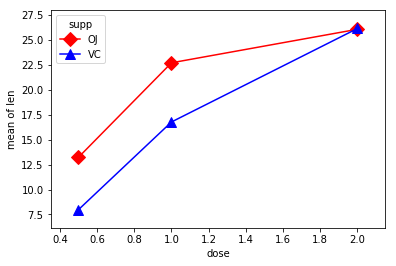

In [25]:
from statsmodels.graphics.factorplots import interaction_plot as ip
fig=ip(data.dose,data.supp,data.len,colors=['red','blue'],markers=['D','^'],ms=10)

In [26]:
# degrees of freedom
N=len(data.len)
df_a=len(data.supp.unique())-1
df_b=len(data.dose.unique())-1
df_axb=df_a*df_b
df_w=N-(len(data.supp.unique())*len(data.dose.unique()))

In [32]:
# sum of squares
grand_mean=data['len'].mean()
ss_a=sum([(data[data.supp==l].len.mean()-grand_mean)**2 for l in data.supp])
ss_b=sum([(data[data.dose==l].len.mean()-grand_mean)**2 for l in data.dose])
ss_t=sum((data.len-grand_mean)**2)

vc=data(data.supp=='VC')
oj=data(data.supp=='OJ')
vc_dose_means=[vc[vc.dose==d].len.mean() for d in vc.dose]
oj_dose_means=[oj[oj.dose==d].len.mean() for d in oj.dose]

ss_v=sum((oj.len-oj.dose.means)**2+sum((vc.len-vc_dose_means)**2)
ss_AxB = ss_t-ss_a-ss_b-ss_v


SyntaxError: invalid syntax (<ipython-input-32-2925c9a8030e>, line 12)

## Hypothesis testing

### T-test

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math

43.000112
39.26


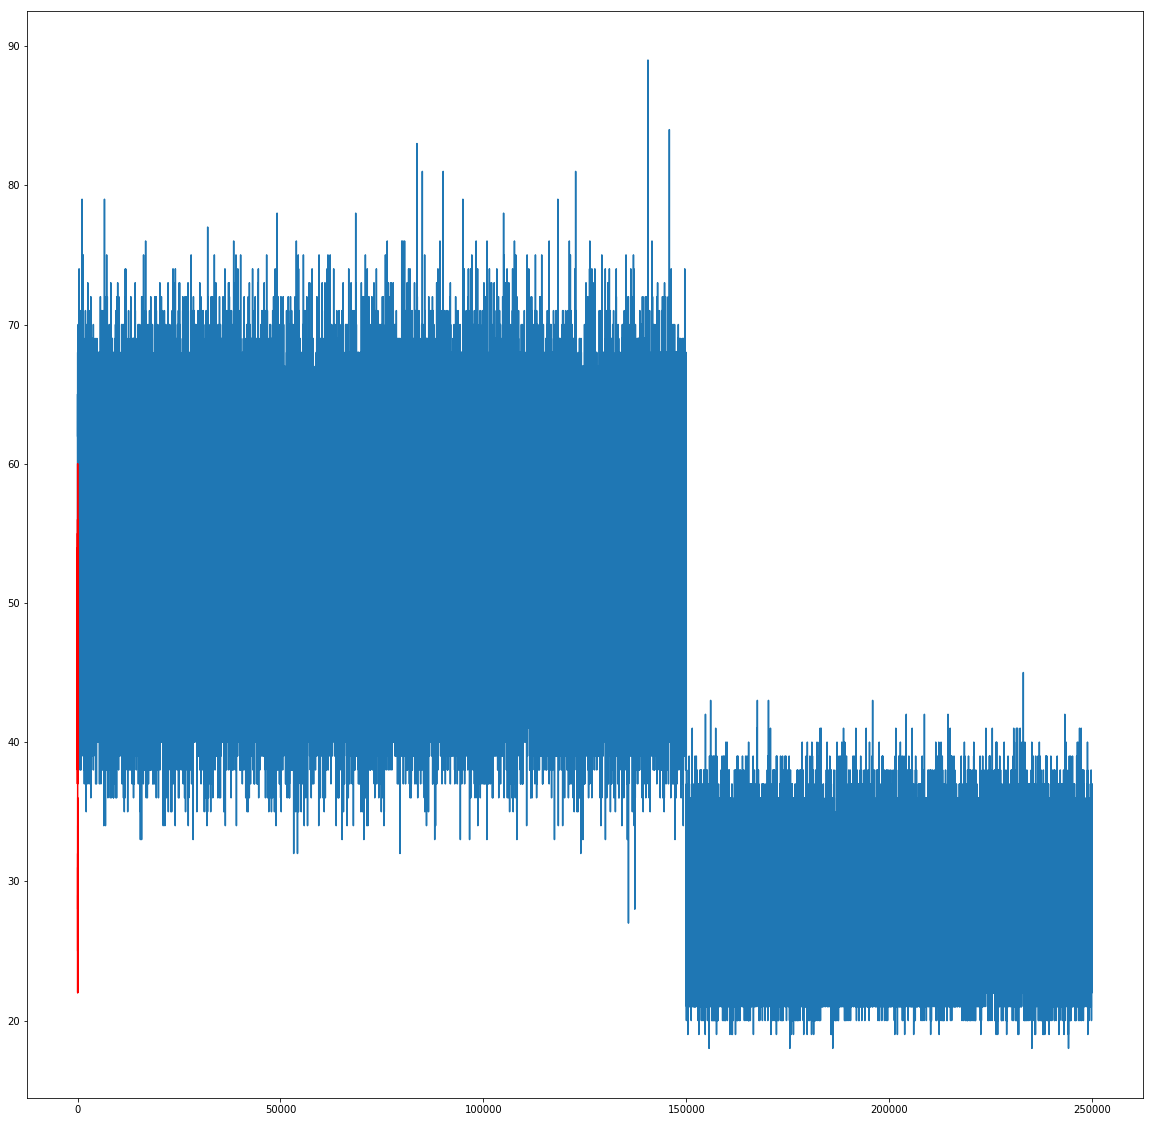

In [39]:
np.random.seed(6)

population_ages1=stats.poisson.rvs(loc=18,mu=35,size=150000)
population_ages2=stats.poisson.rvs(loc=18,mu=10,size=100000)
population_ages=np.concatenate((population_ages1,population_ages2))

bangalore_ages1=stats.poisson.rvs(loc=18,mu=30,size=30)
bangalore_ages2=stats.poisson.rvs(loc=18,mu=10,size=20)
bangalore_ages=np.concatenate((bangalore_ages1,bangalore_ages2))

print(population_ages.mean())
print(bangalore_ages.mean())
plt.plot(population_ages)
plt.plot(bangalore_ages,color='r')

In [15]:
# One sample ttest
stats.ttest_1samp(a=bangalore_ages,                # sample data
                 popmean=population_ages.mean())   # pop  mean

Ttest_1sampResult(statistic=-2.5742714883655027, pvalue=0.013118685425061678)

##### Note: Pvalue of 0.01311 means we'd expect to see data as extreme as our sample due to chance about 1.3% of the time if the null hypothesis was true. In this case, the <span style='color:blue;font-size:16px'> p-value is < our signficance value alpha(0.05)</span> so we should <span style='color:blue;font-size:16px'>reject</span> null hypothesis and we can perform analysis in the data.

In [17]:
# two sample ttest

a=[10,12,9,11,11,12,9,11,9,9]
b=[13,11,9,12,12,11,12,12,10,11]
myTest=stats.ttest_ind(a,b)
myTest

Ttest_indResult(statistic=-1.8534061896456464, pvalue=0.08028906893163547)

##### <span style='color:blue;font-size:16px'>p-value of 0.08 is > our signficance value alpha(0.05)</span> so we should <span style='color:blue;font-size:16px'>not reject</span> null hypothesis, where null hypothesis is taken as both the datasets are same

In [19]:
d=[13,12,9,12,12,13,12,13,10,11]
myTest=stats.ttest_ind(a,d)
myTest

Ttest_indResult(statistic=-2.4168284181234285, pvalue=0.026494688246160383)

##### <span style='color:blue;font-size:16px'>p-value of 0.08 is < our signficance value alpha(0.05)</span> so we should <span style='color:blue;font-size:16px'>reject</span> null hypothesis, where null hypothesis is taken as both the datasets are same

## One way ANOVA

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [24]:
data=pd.read_csv("E:/important notes and lectures/python/INVENTATEQ/datascience/datasets/plantgrowth.csv")

In [25]:
print(data.shape)
print(data.head())

(30, 3)
   Unnamed: 0  weight group
0           1    4.17  ctrl
1           2    5.58  ctrl
2           3    5.18  ctrl
3           4    6.11  ctrl
4           5    4.50  ctrl


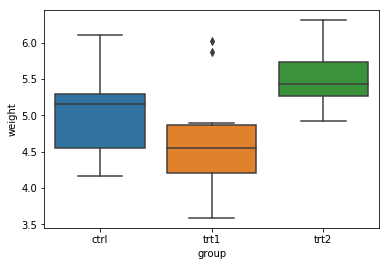

In [31]:
sb.boxplot(data=data,x='group',y='weight')
plt.show()

In [144]:
from scipy import stats
grps=pd.unique(data.group.values)
d_data={grp:data['weight'][data.group==grp] for grp in grps}
#print(grps)
print(d_data)
F,p=stats.f_oneway(d_data['ctrl'],d_data['trt1'],d_data['trt2'])
print('F value is: ',F)
print('p value is: ',p)

{'ctrl': 0    4.17
1    5.58
2    5.18
3    6.11
4    4.50
5    4.61
6    5.17
7    4.53
8    5.33
9    5.14
Name: weight, dtype: float64, 'trt1': 10    4.81
11    4.17
12    4.41
13    3.59
14    5.87
15    3.83
16    6.03
17    4.89
18    4.32
19    4.69
Name: weight, dtype: float64, 'trt2': 20    6.31
21    5.12
22    5.54
23    5.50
24    5.37
25    5.29
26    4.92
27    6.15
28    5.80
29    5.26
Name: weight, dtype: float64}
F value is:  4.846087862380136
p value is:  0.0159099583256229


In [145]:
print(type(d_data))
print(type(d_data['ctrl']))

<class 'dict'>
<class 'pandas.core.series.Series'>


In [146]:
#website: medium/towards datascience

In [192]:
d_data={}
for grp in grps:
    d_data[grp]=[]
    for i in range(len(data.weight)):
        if data.group[i]==grp:
            d_data[grp].append(data.weight[i])

print(d_data)
F,p=stats.f_oneway(d_data['ctrl'],d_data['trt1'],d_data['trt2'])
print('F value is: ',F)
print('p value is: ',p)

{'ctrl': [4.17, 5.58, 5.18, 6.11, 4.5, 4.61, 5.17, 4.53, 5.33, 5.14], 'trt1': [4.81, 4.17, 4.41, 3.59, 5.87, 3.83, 6.03, 4.89, 4.32, 4.69], 'trt2': [6.31, 5.12, 5.54, 5.5, 5.37, 5.29, 4.92, 6.15, 5.8, 5.26]}
F value is:  4.846087862380136
p value is:  0.0159099583256229


## Two way ANOVA

In [197]:
from statsmodels.graphics.factorplots import interaction_plot

In [198]:
data=pd.read_csv("E:/important notes and lectures/python/INVENTATEQ/datascience/datasets/Toothgrowth.csv")

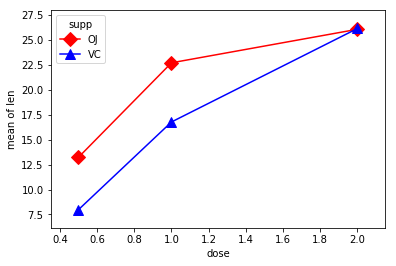

In [199]:
fig=interaction_plot(data.dose, data.supp,data.len,
                    colors=['red','blue'],markers=['D','^'],ms=10)

### Degrees of freedom

In [200]:
N=len(data.len)
df_a=len(data.supp.unique())-1
df_b=len(data.dose.unique())-1
df_axb=df_a*df_b
df_w=N-(len(data.supp.unique()))*(len(data.dose.unique()))

### Sum of squares

In [223]:
grand_mean=data['len'].mean()
ssq_a=sum([(data[data.supp==i].len.mean()-grand_mean)**2 for i in data.supp])
ssq_b=sum([(data[data.dose==i].len.mean()-grand_mean)**2 for i in data.dose])
ssq_t=sum((data.len-grand_mean)**2)

vc=data[data.supp=='VC']
oj=data[data.supp=='OJ']
vc_dose_means = [vc[vc.dose==d].len.mean() for d in vc.dose]
oj_dose_means = [oj[oj.dose==d].len.mean() for d in oj.dose]

ssq_w =sum((oj.len-oj_dose_means)**2)+sum((vc.len-vc_dose_means)**2)
ssq_axb=ssq_t-ssq_a-ssq_b-ssq_w

### Mean squares

In [224]:
ms_a=ssq_a/df_a
ms_b=ssq_b/df_b
ms_axb=ssq_axb/df_axb
ms_w=ssq_w/df_w

### F-ratio

In [225]:
f_a=ms_a/ms_w
f_b=ms_b/ms_w
f_axb=ms_axb/ms_w

### Obtsining p-values

In [226]:
p_a=stats.f.sf(f_a,df_a,df_w)
p_b=stats.f.sf(f_b,df_b,df_w)
p_axb=stats.f.sf(f_axb,df_axb,df_w)

### Result in dataframe

In [227]:
results={'sum_sq':[ssq_a,ssq_b,ssq_axb,ssq_w],
        'df':[df_a,df_b,df_axb,df_w],
        'F':[f_a,f_b,f_axb,'NaN'],
        'PR(>F)':[p_a,p_b,p_axb,'NaN']}
columns=['sum_sq','df','F','PR(>F)']
aov_table1=pd.DataFrame(results,columns=columns,index=['supp','dose','supp:dose','Residual'])
aov_table1

,sum_sq,df,F,PR(>F)
supp,205.350000,1,15.572,0.000231183
dose,2426.434333,2,92,4.04629e-18
supp:dose,108.319000,2,4.10699,0.0218603
Residual,712.106000,54,NaN,NaN


## Simple/Univariate/Single variable linear regression

In [33]:
import pandas as pd
import numpy as np
import seaborn as sb
% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,20.0)
data=pd.read_csv("E:/important notes and lectures/python/INVENTATEQ/datascience/datasets/headbrain.csv")

In [34]:
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


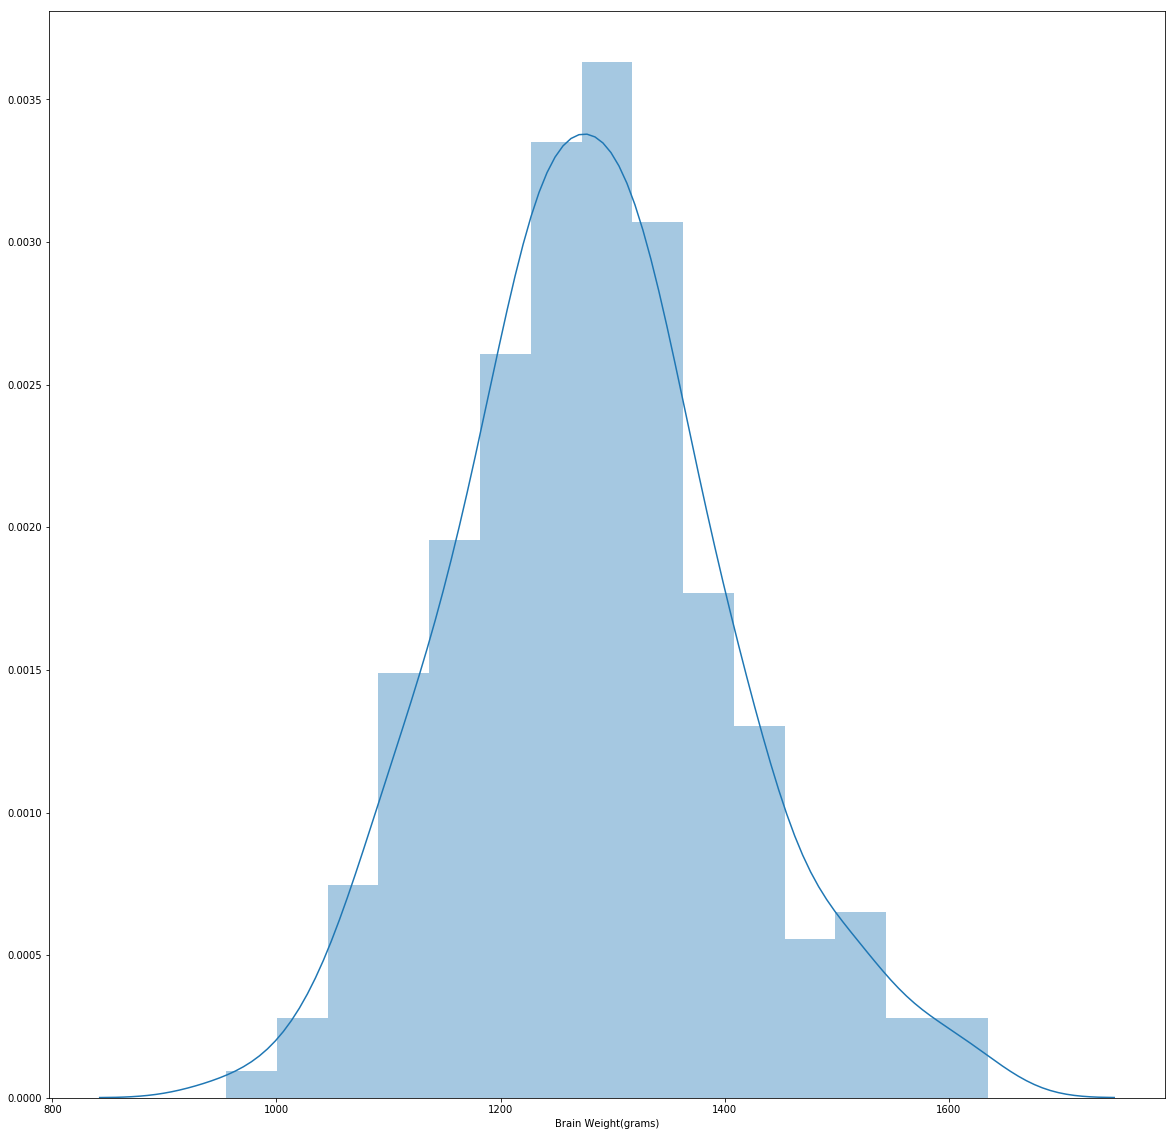

In [35]:
sb.distplot(data['Brain Weight(grams)'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


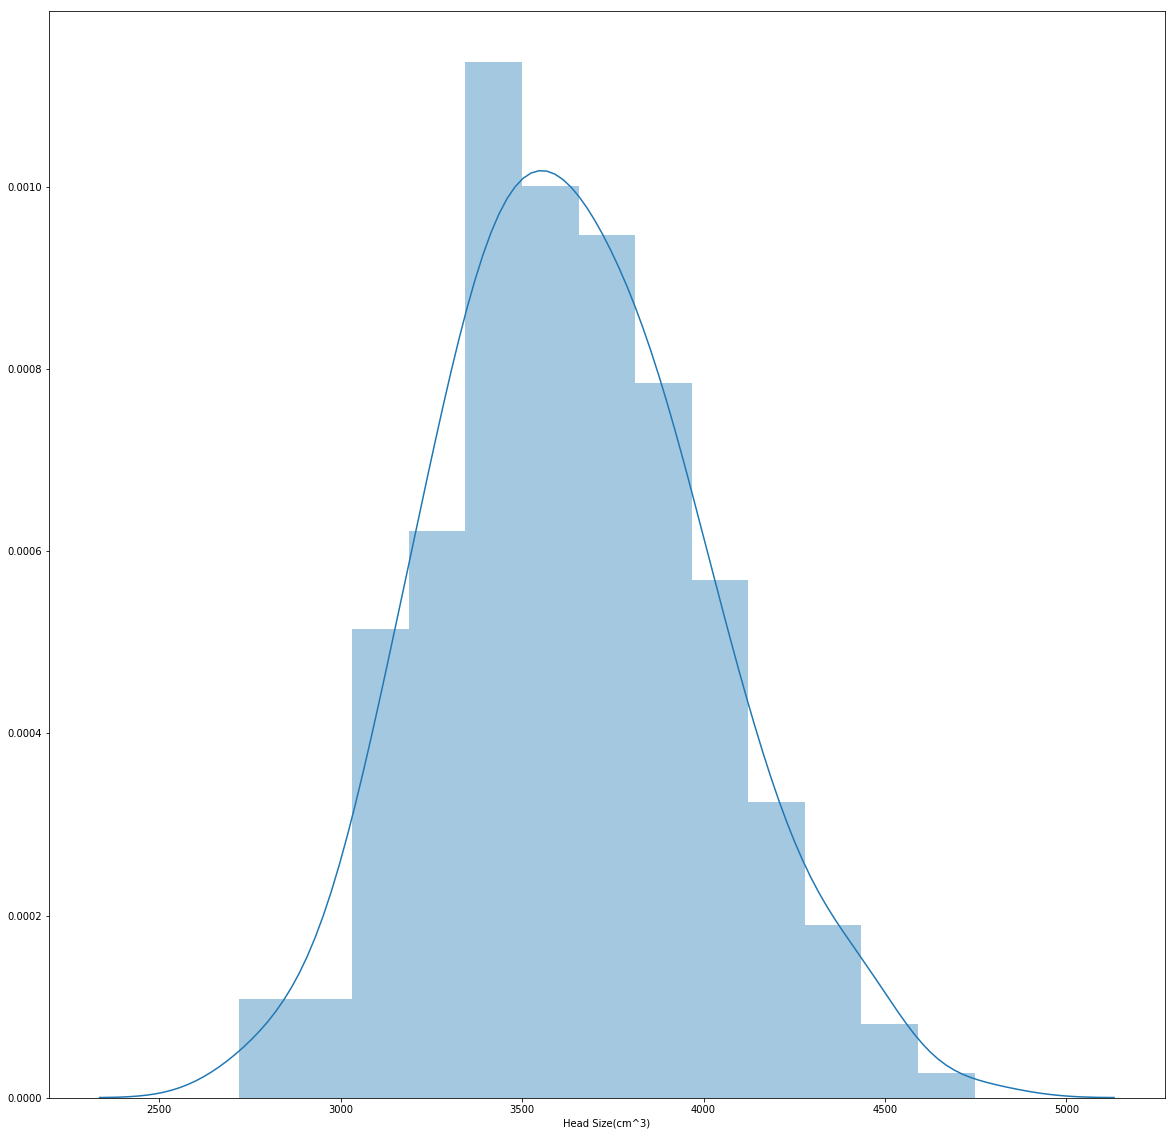

In [90]:
sb.distplot(data['Head Size(cm^3)'])

In [91]:
#collecting X and Y

X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values

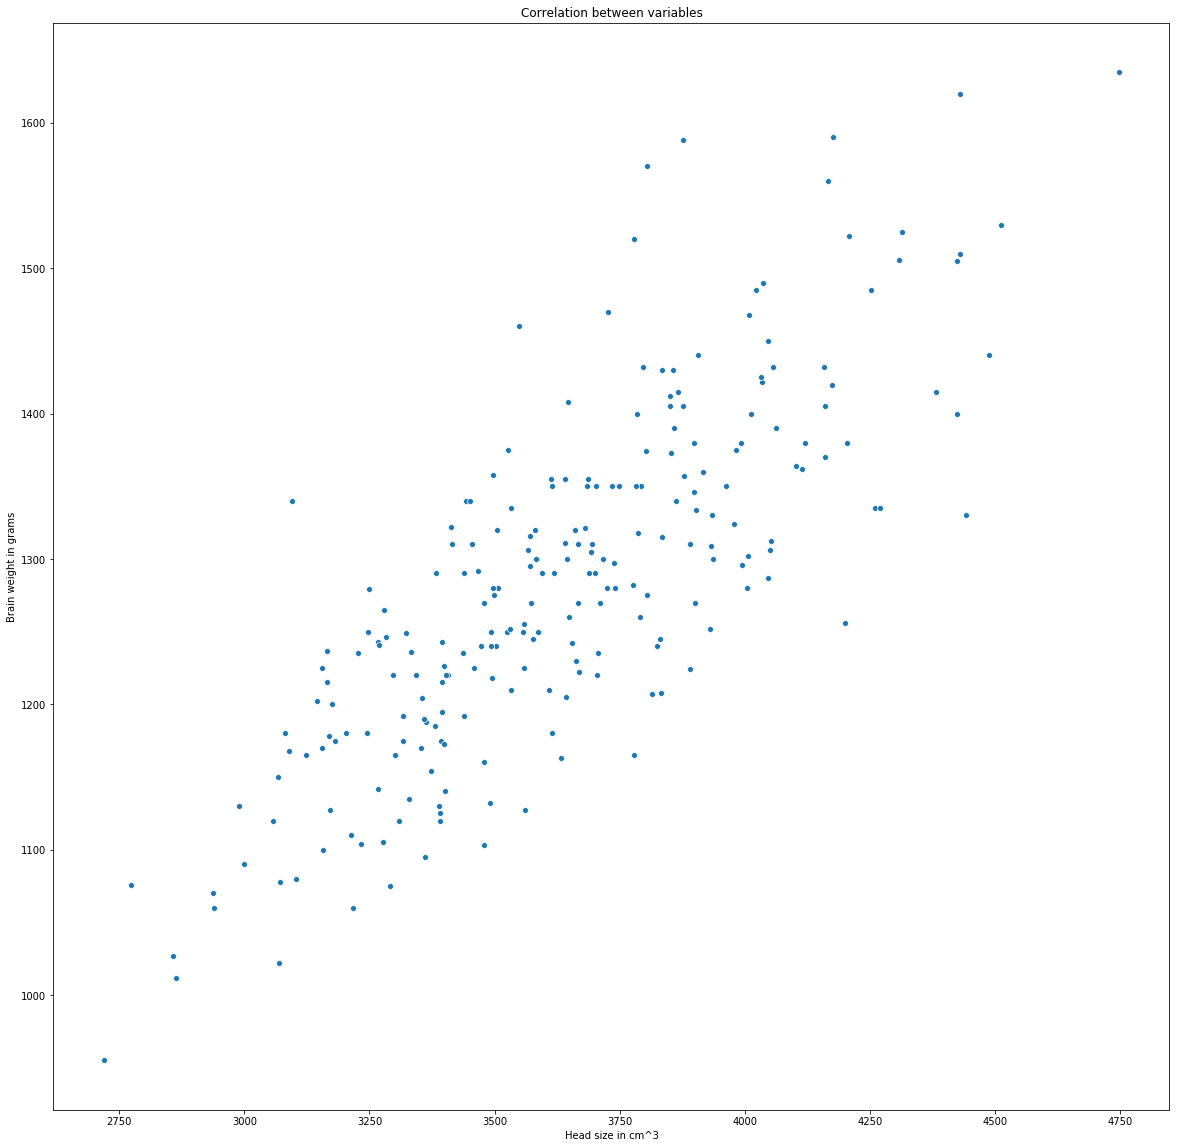

In [92]:
sb.scatterplot(X,Y)
plt.title('Correlation between variables')
plt.xlabel('Head size in cm^3')
plt.ylabel('Brain weight in grams')
plt.show()

### we have to solve Y = b<sub>0</sub> + b<sub>1</sub> X

#### For that we need to find b<sub>1</sub> and substitute in: (Y = b<sub>0</sub> + b<sub>1</sub> X) to get b<sub>0</sub>

#### b<sub>1</sub> = $\sum_{i=1}^{n} (X-X\_mean)(Y-Y\_mean)$/$\sum_{i=1}^{n} (X-X\_mean)$<sup>2</sup>
#### b<sub>0</sub> = Y - b<sub>1</sub> X

In [93]:
# Find means: xbar and ybar
mean_X=np.mean(X)
mean_Y=np.mean(Y)
n=len(X)
numer=0
denom=0

In [94]:
# solving for b1
for i in range(n):
    numer+=(X[i]-mean_X)*(Y[i]-mean_Y)
    denom+=(X[i]-mean_X)**2

b1=numer/denom #slope
b0=mean_Y-b1*mean_X #intercept

print('Slope:{} intercept{}'.format(b1,b0))

Slope:0.26342933948939945 intercept325.57342104944223


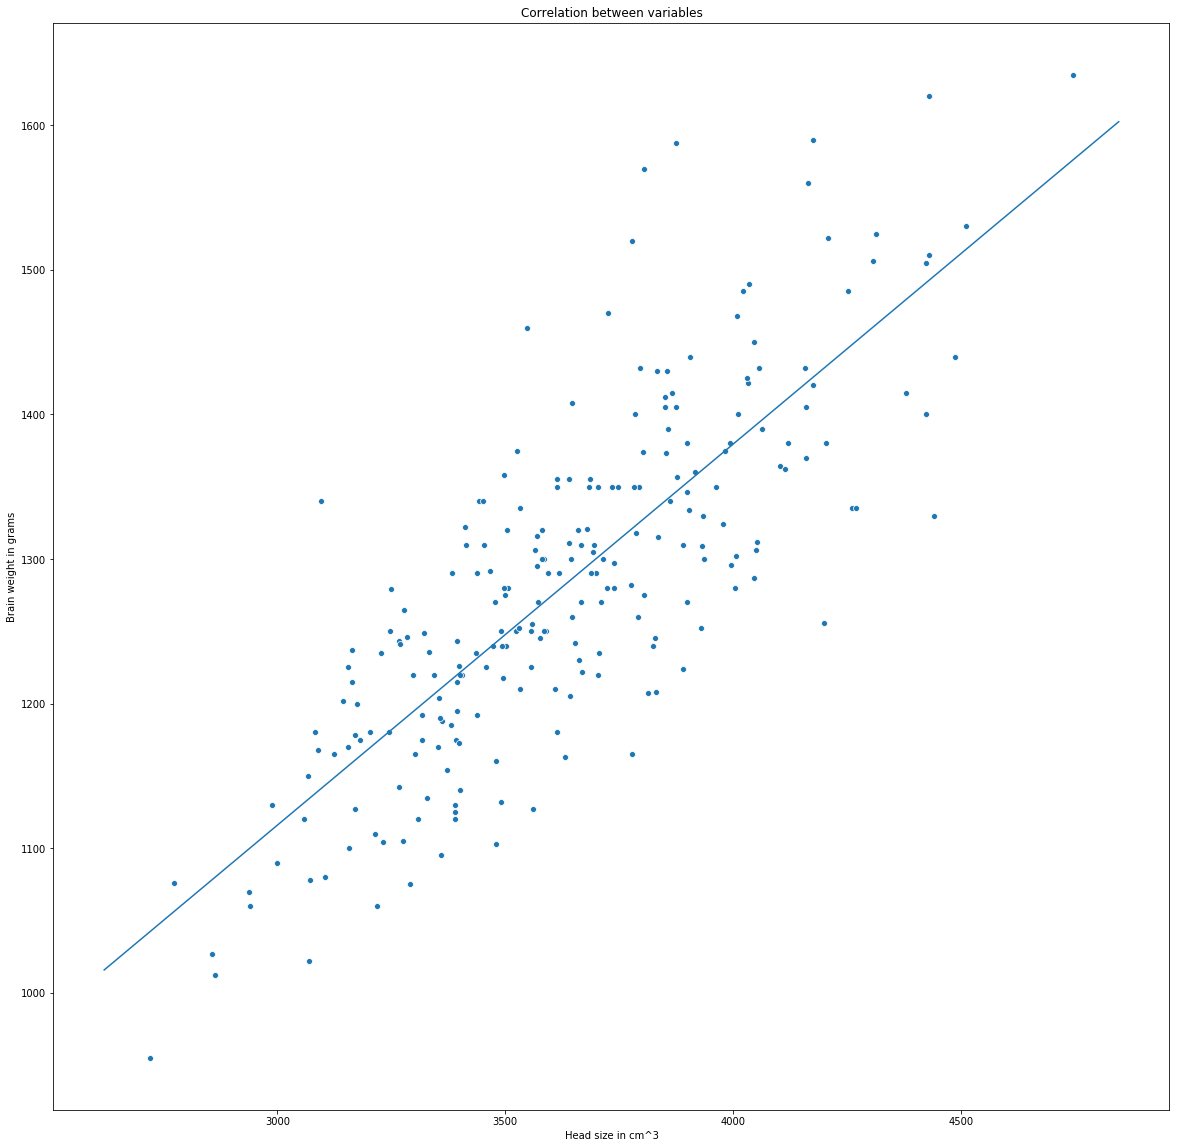

In [95]:
# Finding best fit line
max_x=np.max(X)+100
min_x=np.min(X)-100
x=np.linspace(min_x,max_x,1000)
# Regression equation
y=b0+b1*x
plt.plot(x,y)

sb.scatterplot(X,Y)
plt.title('Correlation between variables')
plt.xlabel('Head size in cm^3')
plt.ylabel('Brain weight in grams')
plt.show()

### Finding Mean square error (MSE) = 1/n$\sum_{i=1}^{n}(Y[i]-Y\_pred[i])$ <sup>2</sup>
### Finding R_MSE=$\sqrt{MSE}$

In [96]:
#Finding Root mean square error value (R_MSE)=root(MSE)
MSE=0
for i in range(n):
    Y_pred=b0+b1*X[i]
    MSE+=(Y[i]-Y_pred)**2/n
    
R_MSE=np.sqrt(MSE)
R_MSE

72.1206213783709

### Finding R<sup>2</Sup>=1-SSR/SST

In [97]:
ssr=0
sst=0

for i in range(n):
    Y_pred=b0+b1*X[i]
    ssr+=(Y[i]-Y_pred)**2
    sst+=(Y[i]-mean_Y)**2
    
r_sqr=1-(ssr/sst)
print('r2_score:',r_sqr)

r2_score: 0.6393117199570003


### linear regression using scikit learn module

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

#cannot use rank 1 matrix in cikit learn
X=X.reshape((n,1))

#creating model
reg=LinearRegression()

#fitting training data
reg=reg.fit(X,Y)

#Y prediction
Y_pred=reg.predict(X)
#plt.plot(X,Y_pred)
#Calculating RMSE and R2 score
mse=mse(Y,Y_pred)
rmse=np.sqrt(mse)
r2_score=reg.score(X,Y)

print('RMSE:{},r2_score:{}'.format(rmse,r2_score))

RMSE:72.1206213783709,r2_score:0.639311719957


### Multivariate regression using gradient descent

In [27]:
import pandas as pd
import numpy as np
import seaborn as sb
% matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize']=(20.0,20.0)
data=pd.read_csv("E:/important notes and lectures/python/INVENTATEQ/datascience/datasets/student.csv")
print(data.shape)
data.head()

(1000, 3)


,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


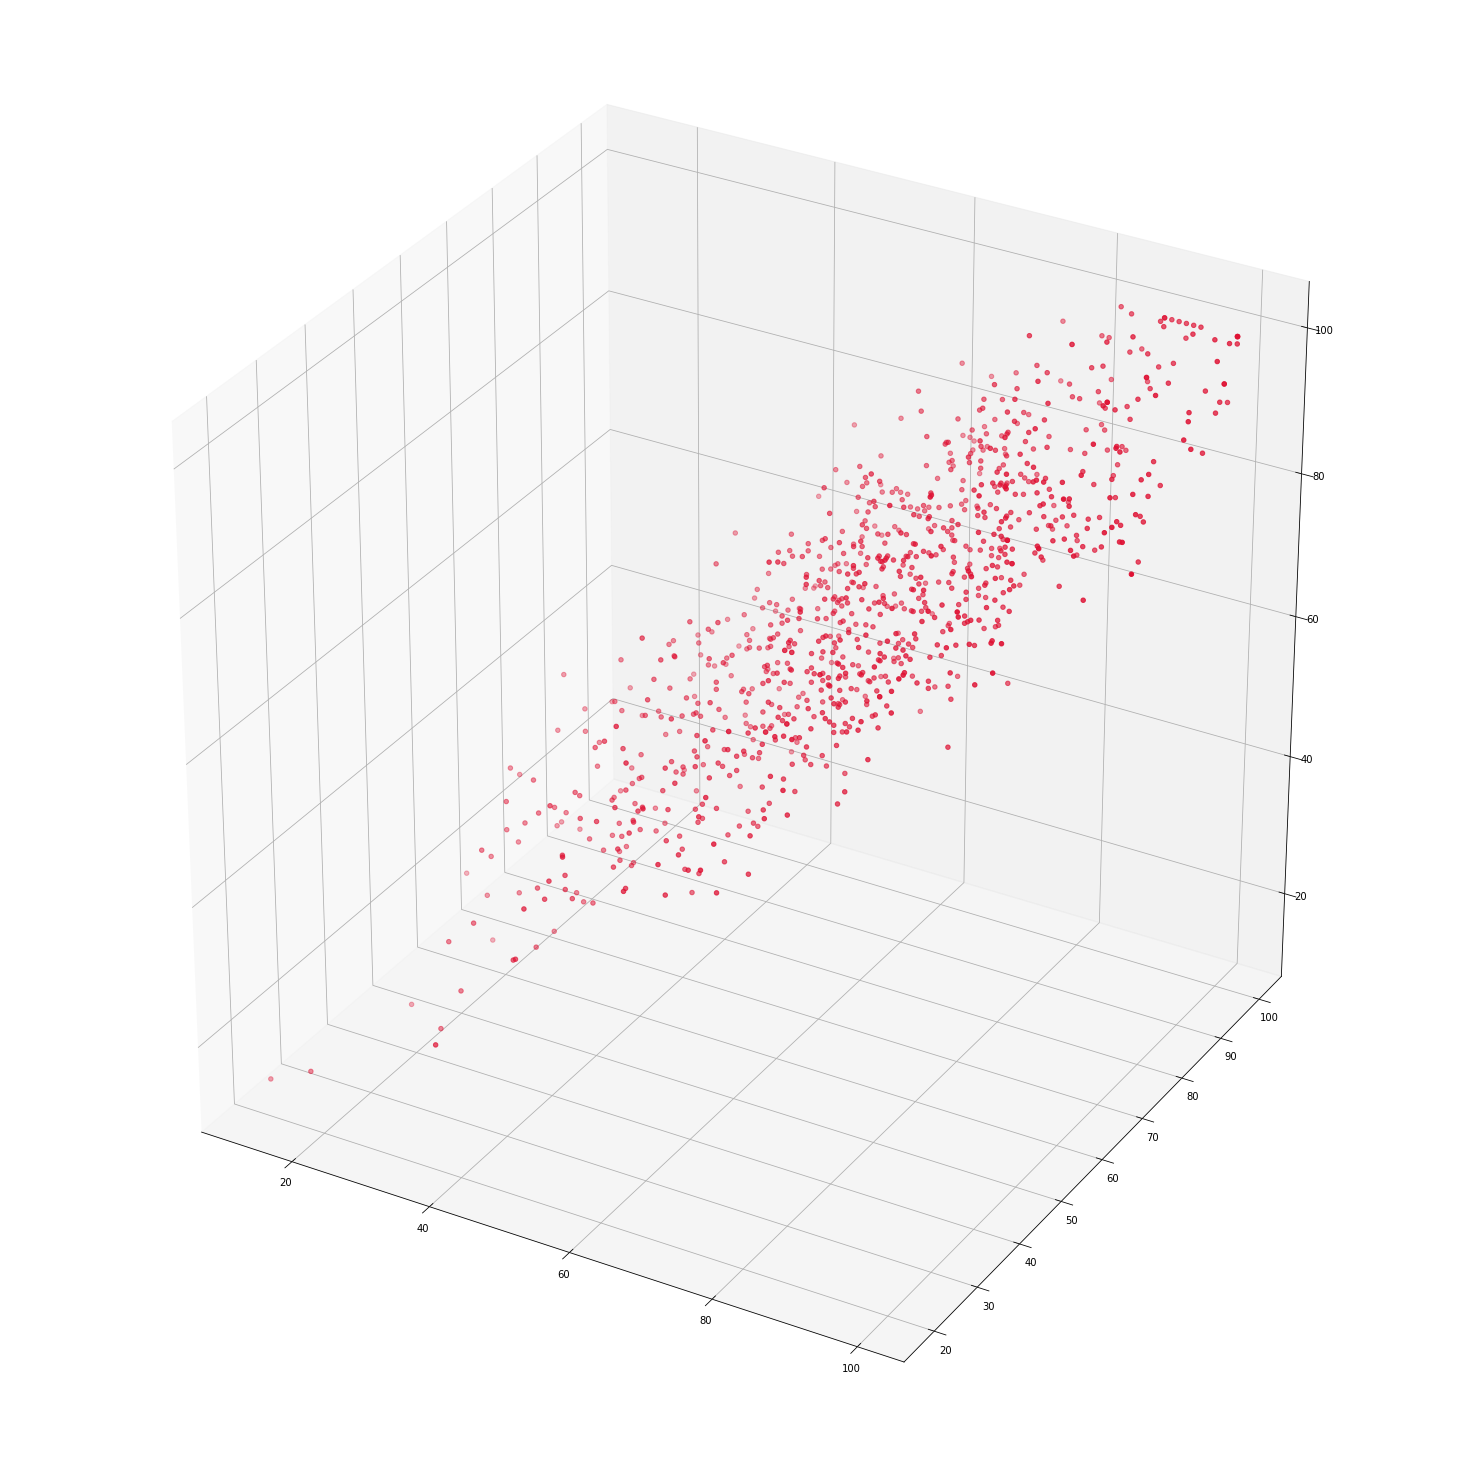

In [28]:
math=data['Math'].values
read=data['Reading'].values
write=data['Writing'].values

#plotting
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(math,read,write,color='#df1234')
plt.show()

#### we will now generate X,Y and B

In [29]:
m=len(math)
x0=np.ones(m)
X=np.array([x0,math,read]).T

#Initial coefficients
B=np.array([0,0,0])
Y=np.array(write)
alpha=0.0001

In [30]:
B.shape

(3,)

#### Define cost function

In [31]:
def cost_function(X,Y,B):
    m=len(Y)
    J=np.sum((X.dot(B)-Y)**2)/(2*m)
    return J

In [32]:
initial_cost=cost_function(X,Y,B)
initial_cost

2470.11

#### Gradient descent

In [33]:
def gradient_descent(X,Y,B,alpha,iterations):
    cost_history=[0]*iterations
    m=len(Y)
    
    for iteration in range(iterations):
        # Hypothesis values
        h=X.dot(B)
        # Difference between hypothesis and actual Y
        loss=h-Y
        # Gradient calculation
        gradient=X.T.dot(loss)/m
        # Changing values of B using gradient (coefficient vector -learning rate + gradient)
        B=B-alpha*gradient
        # New cost value
        cost=cost_function(X,Y,B)
        cost_history[iteration]=cost
        
    return B,cost_history
        

In [34]:
# 100000 iterations
newB,cost_history=gradient_descent(X,Y,B,alpha,100000)
    
#new values of B
print(newB)

#final cost of new B
print(np.min(cost_history))

[-0.47889172  0.09137252  0.90144884]
10.475123473539167


In [35]:
# model evaluation - RMSE
def rmse(Y,Y_pred):
        rmse=np.sqrt(sum((Y-Y_pred)**2)/len(Y))
        return rmse
    
# Model evaluation - R2 score
def r2_score(Y,Y_pred):
    mean_y=np.mean(Y)
    ss_tot=sum((Y-mean_Y)**2)
    ss_res=sum((Y-Y_pred)**2)
    r2=1-(ss_res/ss_tot)
    return r2

Y_pred=X.dot(newB)
mean_Y=np.mean(Y)
print(rmse(Y,Y_pred))
print(r2_score(Y,Y_pred))

4.5771439727277885
0.9097223273061554


### using ML:

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

#cannot use rank 1 matrix in cikit learn
X=np.array([math,read]).T
Y=np.array(write)

#creating model
reg=LinearRegression()

#fitting training data
reg=reg.fit(X,Y)

#Y prediction
Y_pred=reg.predict(X)
#plt.plot(X,Y_pred)
#Calculating RMSE and R2 score
mse=mse(Y,Y_pred)
rmse=np.sqrt(mse)
r2_score=reg.score(X,Y)

print('RMSE:{}\nr2_score:{}'.format(rmse,r2_score))

RMSE:4.572887051836439
r2_score:0.9098901726717316


### Residual analysis

#### used to check whether the linear model adopted is suitable or not.
#### if the residual (error) = (Y-pred -Y) is distributed in both the positive and negative axes, the data is suitable for adopting linear model

##### Note:Uci machine learning repository - for good problems on machine learning

### variation inflation factor (VIF)

#### VIF=1/(1-R<sup>2</sup>) ; where R is the constant


In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

data = pd.read_csv('E:/important notes and lectures/python/INVENTATEQ/datascience/datasets/student.csv')
df = pd.DataFrame(data)
X = add_constant(df)

In [6]:
pd.Series([variance_inflation_factor(X.values,i)
          for i in range(X.shape[1])], index=X.columns)

const      24.937662
Math        2.960544
Reading    11.368520
Writing    11.097569
dtype: float64

#### correlation coefficient (Gives a confusion matrix)

In [13]:
np.corrcoef(data['Reading'],data['Writing'])

array([[1.       , 0.9522257],
       [0.9522257, 1.       ]])

#### in the above example the correlation coefficient shows 95% for Reading and Writing, so they are highly correlated. Therefore we have to take either of the two for regression analysis

## Categorical data analysis

### Types:
>#### Nominal - Categories are more than two which cannot be ordered
>#### Ordinal - categories are more than two and can be ordered
>#### Dichotomous - Categories are only two 

### Logistic Regression

#### We use sigmoid activation function: f(X)=1/1-e<sup>-X</sup>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
% matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize']=(20.0,20.0)
data=pd.read_csv("E:/important notes and lectures/python/INVENTATEQ/datascience/datasets/insurance_data.csv")
print(data.shape)
data.head()

(27, 2)


,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


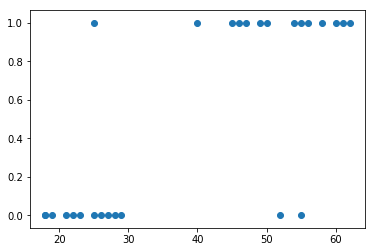

In [3]:
plt.scatter(data.age,data.bought_insurance)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


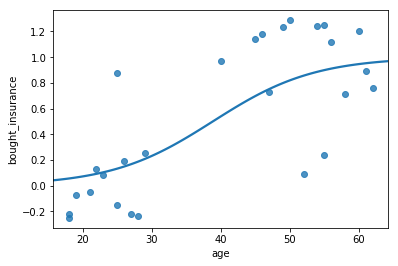

In [10]:
sb.regplot(x='age',y='bought_insurance',data=data,
          logistic=True, n_boot=500, y_jitter=0.3)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data[['age']],data.bought_insurance,test_size=0.1, random_state=66)

X_test

,age
1,25
26,23
4,46


In [15]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [16]:
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
model.predict(X_test)

array([0, 0, 1], dtype=int64)

In [18]:
model.predict_proba(X_test)

array([[0.57549206, 0.42450794],
       [0.60039152, 0.39960848],
       [0.31537126, 0.68462874]])

In [19]:
model.predict(28)

array([0], dtype=int64)

##### invitation game - movie about machine learning


### Types of Machine lerning
>### Supervised
>### Unsupervised
>### Semi supervised
>### Reinforcement learning

 ## Supervised learning
 
 #### Y=f(X) ; Y=target, X=feature
 #### map feature(X) to target(Y) by using a mapping function.
 #### Data should be labelled
 #### Types of supervised learning:
 >#### Classification (for catagorical dependent variable(target))
 >#### Regression (for continuous data)

 ## Un-supervised learning
 
 #### only X and no target

### Converting categorical data into numeric

In [21]:
import pandas as pd
import numpy as np
import seaborn as sb
% matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize']=(20.0,20.0)
data=pd.read_excel("E:/important notes and lectures/python/INVENTATEQ/datascience/datasets/stark_data.xlsx")
print(data.shape)
data.head()

(6, 4)


,Character,Age,Gender,Survived
0,Eddard,52.0,Male,0
1,John,27.0,Male,1
2,Arya,21.0,Female,1
3,Bran,19.0,Male,1
4,Robb,NaN,Male,0


In [22]:
X_gender=data.iloc[:,2].values
X_gender

array(['Male', 'Male', 'Female', 'Male', 'Male', 'Female'], dtype=object)

In [23]:
# converting categorical features
X_dummy1=pd.get_dummies(X_gender)
X_dummy1

,Female,Male
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1
5,1,0


In [24]:
# converting categorical features by dropping any one dummy column 
X_dummy2=pd.get_dummies(X_gender,drop_first=True)
X_dummy2

,Male
0,1
1,1
2,0
3,1
4,1
5,0


#### Using ML method

In [49]:
import pandas as pd
import numpy as np
import seaborn as sb
% matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize']=(20.0,20.0)
data=pd.read_excel("E:/important notes and lectures/python/INVENTATEQ/datascience/datasets/stark_data.xlsx")
print(data.shape)
data.head()

(6, 4)


,Character,Age,Gender,Survived
0,Eddard,52.0,Male,0
1,John,27.0,Male,1
2,Arya,21.0,Female,1
3,Bran,19.0,Male,1
4,Robb,NaN,Male,0


In [50]:
X=data.iloc[:,:-1].values
X

array([['Eddard', 52.0, 'Male'],
       ['John', 27.0, 'Male'],
       ['Arya', 21.0, 'Female'],
       ['Bran', 19.0, 'Male'],
       ['Robb', nan, 'Male'],
       ['Sansa', 24.0, 'Female']], dtype=object)

In [51]:
# impute missing value using sklearn imputer
from sklearn.preprocessing import Imputer

imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer.fit(X[:,1:2])
X[:,1:2]=imputer.transform(X[:,1:2])
X[:,1:2]

array([[52.0],
       [27.0],
       [21.0],
       [19.0],
       [28.6],
       [24.0]], dtype=object)

In [52]:
# Column gender encoding
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
Label_X=LabelEncoder()
X[:,2]=Label_X.fit_transform(X[:,2])
X[:,2]

array([1, 1, 0, 1, 1, 0], dtype=object)

In [53]:
# column name encoding
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
Label_X=LabelEncoder()
X[:,0]=Label_X.fit_transform(X[:,0])
X[:,0]

array([2, 3, 0, 1, 4, 5], dtype=object)

In [54]:
X

array([[2, 52.0, 1],
       [3, 27.0, 1],
       [0, 21.0, 0],
       [1, 19.0, 1],
       [4, 28.6, 1],
       [5, 24.0, 0]], dtype=object)

In [56]:
#one hot encoding (label encoding is sufficient when we have only 2 categories, but if we have more than 2 categories it is mandatory to do onehot encoding along with label encoding)
onehotencoder=OneHotEncoder(categorical_features=[0])
X=onehotencoder.fit_transform(X).toarray()
X

array([[ 1. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. , 52. ,  1. ],
       [ 1. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. , 27. ,  1. ],
       [ 0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. , 21. ,  0. ],
       [ 1. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. , 19. ,  1. ],
       [ 1. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. , 28.6,  1. ],
       [ 1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. , 24. ,  0. ]])

### Feature scaling


In [57]:
import pandas as pd
import numpy as np
import seaborn as sb
% matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize']=(20.0,20.0)
data=pd.read_excel("E:/important notes and lectures/python/INVENTATEQ/datascience/datasets/stark_data.xlsx")
print(data.shape)
data.head()

(6, 4)


,Character,Age,Gender,Survived
0,Eddard,52.0,Male,0
1,John,27.0,Male,1
2,Arya,21.0,Female,1
3,Bran,19.0,Male,1
4,Robb,NaN,Male,0


In [58]:
X=data.iloc[:,:-1].values
X

array([['Eddard', 52.0, 'Male'],
       ['John', 27.0, 'Male'],
       ['Arya', 21.0, 'Female'],
       ['Bran', 19.0, 'Male'],
       ['Robb', nan, 'Male'],
       ['Sansa', 24.0, 'Female']], dtype=object)

In [59]:
# impute missing value using sklearn imputer
from sklearn.preprocessing import Imputer

imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer.fit(X[:,1:2])
X[:,1:2]=imputer.transform(X[:,1:2])
X[:,1:2]

array([[52.0],
       [27.0],
       [21.0],
       [19.0],
       [28.6],
       [24.0]], dtype=object)

In [60]:
# Column gender encoding
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
Label_X=LabelEncoder()
X[:,2]=Label_X.fit_transform(X[:,2])
X[:,2]

array([1, 1, 0, 1, 1, 0], dtype=object)

In [61]:
# column name encoding
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
Label_X=LabelEncoder()
X[:,0]=Label_X.fit_transform(X[:,0])
X[:,0]

array([2, 3, 0, 1, 4, 5], dtype=object)

In [62]:
X

array([[2, 52.0, 1],
       [3, 27.0, 1],
       [0, 21.0, 0],
       [1, 19.0, 1],
       [4, 28.6, 1],
       [5, 24.0, 0]], dtype=object)

In [63]:
#one hot encoding (label encoding is sufficient when we have only 2 categories, but if we have more than 2 categories it is mandatory to do onehot encoding along with label encoding)
onehotencoder=OneHotEncoder(categorical_features=[0])
X=onehotencoder.fit_transform(X).toarray()
X

array([[ 0. ,  0. ,  1. ,  0. ,  0. ,  0. , 52. ,  1. ],
       [ 0. ,  0. ,  0. ,  1. ,  0. ,  0. , 27. ,  1. ],
       [ 1. ,  0. ,  0. ,  0. ,  0. ,  0. , 21. ,  0. ],
       [ 0. ,  1. ,  0. ,  0. ,  0. ,  0. , 19. ,  1. ],
       [ 0. ,  0. ,  0. ,  0. ,  1. ,  0. , 28.6,  1. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  1. , 24. ,  0. ]])

In [64]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
standardscalerX=StandardScaler()
X=standardscalerX.fit_transform(X)

In [65]:
X

array([[-4.47213595e-01, -4.47213595e-01,  2.23606798e+00,
        -4.47213595e-01, -4.47213595e-01, -4.47213595e-01,
         2.13434010e+00,  7.07106781e-01],
       [-4.47213595e-01, -4.47213595e-01, -4.47213595e-01,
         2.23606798e+00, -4.47213595e-01, -4.47213595e-01,
        -1.45937784e-01,  7.07106781e-01],
       [ 2.23606798e+00, -4.47213595e-01, -4.47213595e-01,
        -4.47213595e-01, -4.47213595e-01, -4.47213595e-01,
        -6.93204476e-01, -1.41421356e+00],
       [-4.47213595e-01,  2.23606798e+00, -4.47213595e-01,
        -4.47213595e-01, -4.47213595e-01, -4.47213595e-01,
        -8.75626707e-01,  7.07106781e-01],
       [-4.47213595e-01, -4.47213595e-01, -4.47213595e-01,
        -4.47213595e-01,  2.23606798e+00, -4.47213595e-01,
         3.24046977e-16,  7.07106781e-01],
       [-4.47213595e-01, -4.47213595e-01, -4.47213595e-01,
        -4.47213595e-01, -4.47213595e-01,  2.23606798e+00,
        -4.19571130e-01, -1.41421356e+00]])